In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

X_train, X_test = X_train/255, X_test/255

# Convolutional Autoencoder using Transposed Convolution

In [3]:
from tensorflow.keras.layers import Layer, Input, Dense, LeakyReLU, GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Conv2DTranspose, Reshape
from tensorflow.keras.models import Model

inputs = Input(shape=(28, 28, 1))
encoded = Conv2D(8, kernel_size=3, strides=1, padding='same')(inputs)
encoded = LeakyReLU(0.01)(encoded)
encoded = Conv2D(16, kernel_size=3, strides=2, padding='same')(encoded)
encoded = LeakyReLU(0.01)(encoded)
encoded = Conv2D(32, kernel_size=3, strides=2, padding='same')(encoded)
encoded = LeakyReLU(0.01)(encoded)
encoded = Flatten()(encoded)
encoded = Dense(32)(encoded)
encoded = LeakyReLU(0.01)(encoded)

decoded = Dense(7*7*1)(encoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Reshape((7, 7, 1))(decoded)
decoded = Conv2DTranspose(32, kernel_size=3, strides=1, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Conv2DTranspose(16, kernel_size=3, strides=2, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Conv2DTranspose(8, kernel_size=3, strides=2, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')(decoded)

encoder = Model(inputs=inputs, outputs=encoded)
autoencoder = Model(inputs=inputs, outputs=decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='binary_crossentropy')

autoencoder.summary()

Metal device set to: Apple M1 Max


2022-11-05 15:54:37.205153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-05 15:54:37.205280: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 7, 7, 32)          0   

In [4]:
autoencoder.fit(X_train, X_train, 
                epochs=100, batch_size=1024, 
                shuffle=True)

Epoch 1/100


2022-11-05 15:54:37.639028: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-05 15:54:37.907648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 4s 20ms/step - loss: 0.6856
Epoch 2/100
59/59 [==============================] - 1s 18ms/step - loss: 0.4881
Epoch 3/100
59/59 [==============================] - 1s 18ms/step - loss: 0.3254
Epoch 4/100
59/59 [==============================] - 1s 18ms/step - loss: 0.2794
Epoch 5/100
59/59 [==============================] - 1s 18ms/step - loss: 0.2571
Epoch 6/100
59/59 [==============================] - 1s 18ms/step - loss: 0.2341
Epoch 7/100
59/59 [==============================] - 1s 18ms/step - loss: 0.2083
Epoch 8/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1887
Epoch 9/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1723
Epoch 10/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1615
Epoch 11/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1543
Epoch 12/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1485
Epoch 13/100
59/59 [=================

In [5]:
X1 = X_test[0:1, :]
Z1 = encoder.predict(X1)
R1 = autoencoder.predict(X1)

X2 = X_test[1:2, :]
Z2 = encoder.predict(X2)
R2 = autoencoder.predict(X2)

2022-11-05 15:56:24.682874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 455ms/step


2022-11-05 15:56:25.153548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


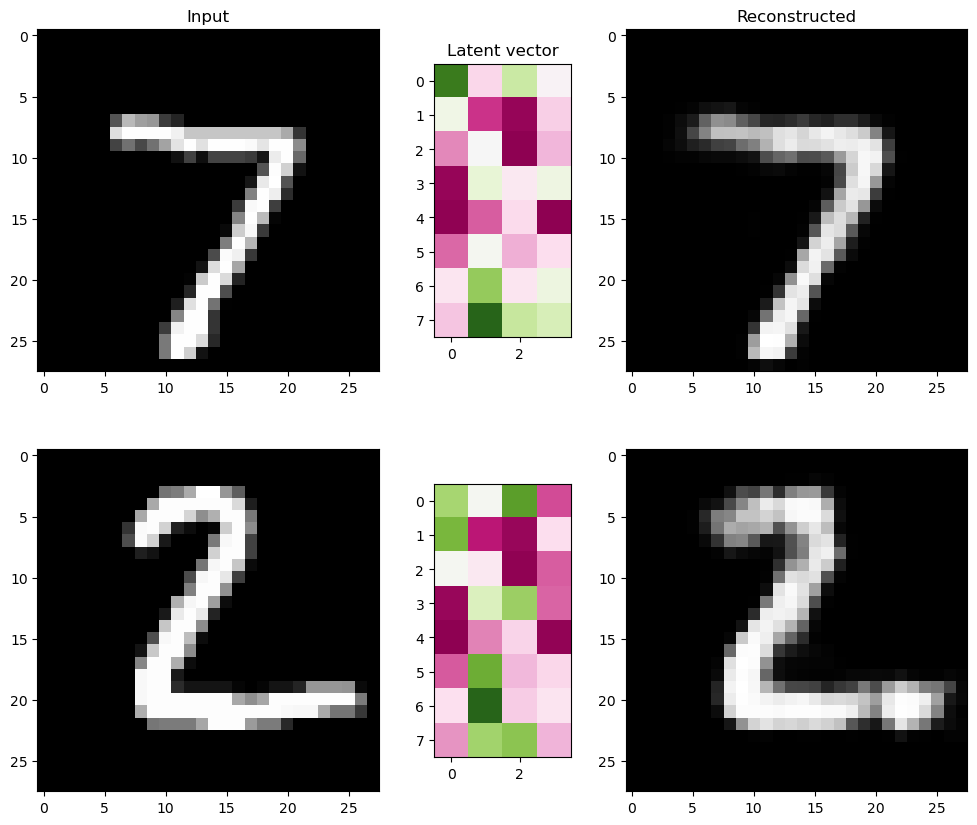

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 10), width_ratios=(5,2,5))
ax[0, 0].imshow(X1.reshape((28, 28)), cmap='gray')
ax[0, 1].imshow(Z1.reshape((8, 4)), cmap='PiYG')
ax[0, 2].imshow(R1.reshape((28, 28)), cmap='gray')
ax[1, 0].imshow(X2.reshape((28, 28)), cmap='gray')
ax[1, 1].imshow(Z2.reshape((8, 4)), cmap='PiYG')
ax[1, 2].imshow(R2.reshape((28, 28)), cmap='gray')

ax[0, 0].set_title('Input')
ax[0, 1].set_title('Latent vector')
ax[0, 2].set_title('Reconstructed')

# plt.show()
plt.savefig("mnist_convtr_autoencoder_output.pdf", bbox_inches='tight')

In [7]:
# Convolutional Autoencoder using Upsampling

In [8]:
from tensorflow.keras.layers import Layer, Input, Dense, LeakyReLU 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model

inputs = Input(shape=(28, 28, 1))
encoded = Conv2D(8, kernel_size=3, strides=1, padding='same')(inputs)
encoded = LeakyReLU(0.01)(encoded)
encoded = Conv2D(16, kernel_size=3, strides=2, padding='same')(encoded)
encoded = LeakyReLU(0.01)(encoded)
encoded = Conv2D(32, kernel_size=3, strides=2, padding='same')(encoded)
encoded = LeakyReLU(0.01)(encoded)
encoded = Flatten()(encoded)
encoded = Dense(32)(encoded)
encoded = LeakyReLU(0.01)(encoded)

decoded = Dense(7*7*1)(encoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Reshape((7, 7, 1))(decoded)
decoded = Conv2D(32, kernel_size=3, strides=1, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = UpSampling2D(size=(2, 2))(decoded)
decoded = Conv2D(16, kernel_size=3, strides=1, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = UpSampling2D(size=(2, 2))(decoded)
decoded = Conv2D(8, kernel_size=3, strides=1, padding='same')(decoded)
decoded = LeakyReLU(0.01)(decoded)
decoded = Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')(decoded)

encoder = Model(inputs=inputs, outputs=encoded)
autoencoder = Model(inputs=inputs, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 7, 7, 32)          0   

In [9]:
autoencoder.fit(X_train, X_train, 
                epochs=100, batch_size=512, 
                shuffle=True)

Epoch 1/100


2022-11-05 15:56:26.599045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 6s 39ms/step - loss: 0.4019
Epoch 2/100
118/118 [==============================] - 4s 37ms/step - loss: 0.2009
Epoch 3/100
118/118 [==============================] - 4s 36ms/step - loss: 0.1607
Epoch 4/100
118/118 [==============================] - 4s 38ms/step - loss: 0.1439
Epoch 5/100
118/118 [==============================] - 4s 34ms/step - loss: 0.1348
Epoch 6/100
118/118 [==============================] - 4s 34ms/step - loss: 0.1293
Epoch 7/100
118/118 [==============================] - 4s 35ms/step - loss: 0.1240
Epoch 8/100
118/118 [==============================] - 4s 36ms/step - loss: 0.1204
Epoch 9/100
118/118 [==============================] - 4s 35ms/step - loss: 0.1178
Epoch 10/100
118/118 [==============================] - 4s 37ms/step - loss: 0.1155
Epoch 11/100
118/118 [==============================] - 4s 37ms/step - loss: 0.1137
Epoch 12/100
118/118 [==============================] - 4s 35ms/step - loss: 0.1120
Epoch 13/100


In [10]:
X1 = X_test[0:1, :]
Z1 = encoder.predict(X1)
R1 = autoencoder.predict(X1)

X2 = X_test[1:2, :]
Z2 = encoder.predict(X2)
R2 = autoencoder.predict(X2)

1/1 [==============================] - 0s 114ms/step


2022-11-05 16:03:14.841038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 16:03:14.907263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


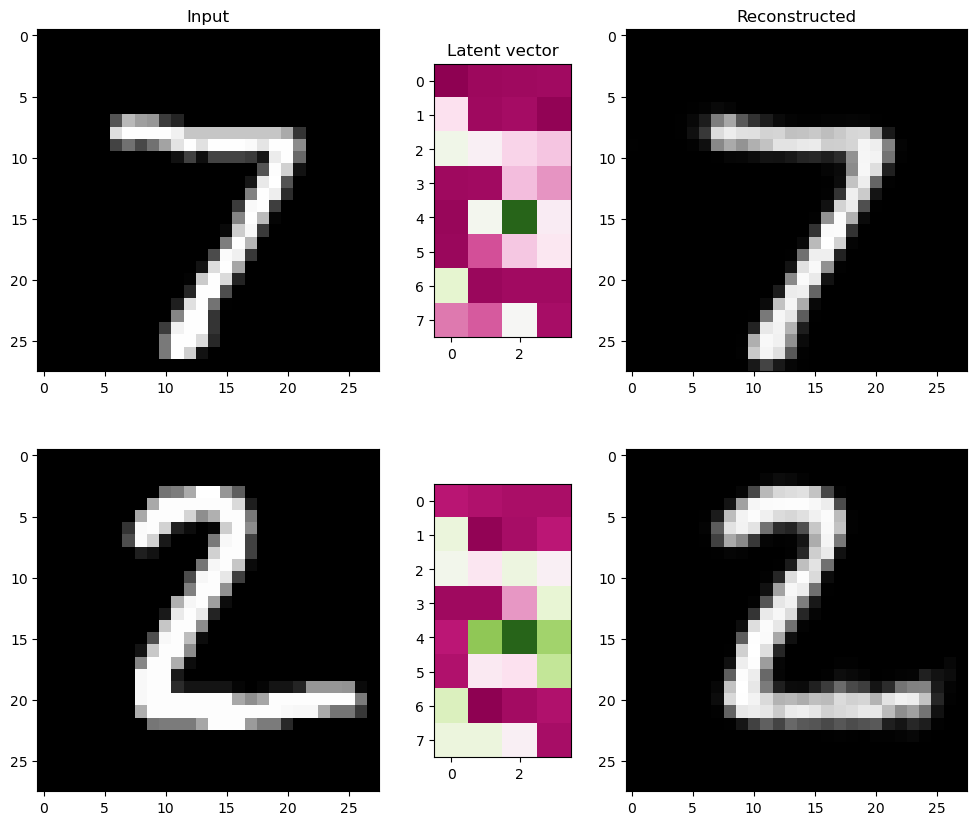

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 10), width_ratios=(5,2,5))
ax[0, 0].imshow(X1.reshape((28, 28)), cmap='gray')
ax[0, 1].imshow(Z1.reshape((8, 4)), cmap='PiYG')
ax[0, 2].imshow(R1.reshape((28, 28)), cmap='gray')
ax[1, 0].imshow(X2.reshape((28, 28)), cmap='gray')
ax[1, 1].imshow(Z2.reshape((8, 4)), cmap='PiYG')
ax[1, 2].imshow(R2.reshape((28, 28)), cmap='gray')

ax[0, 0].set_title('Input')
ax[0, 1].set_title('Latent vector')
ax[0, 2].set_title('Reconstructed')

# plt.show()
plt.savefig("mnist_upsamp_autoencoder_output.pdf", bbox_inches='tight')